# SVM Classifiers

In [3]:
!pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearnex import patch_sklearn_sklearn
patch_sklearn()
import torch
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

AttributeError: module 'threadpoolctl' has no attribute 'ThreadpoolController'

In [2]:
ROOT_PATH='data'

BATCH_SIZE=1000

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR100(root=ROOT_PATH, download=True, train=True, transform=transform)
test_dataset = CIFAR100(root=ROOT_PATH, train=False, transform=transform)

train_data_loader = DataLoader(dataset=train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(dataset=test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

100%|██████████| 169001437/169001437 [00:02<00:00, 57112054.05it/s]


Extracting data/cifar-100-python.tar.gz to data


In [3]:
for train_data, train_labels in train_data_loader:
    print(train_data.shape)
    print(train_labels.shape)
    break

for eval_data, eval_labels in test_data_loader:
    print(eval_data.shape)
    print(eval_labels.shape)
    break

torch.Size([1000, 3, 32, 32])
torch.Size([1000])
torch.Size([1000, 3, 32, 32])
torch.Size([1000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


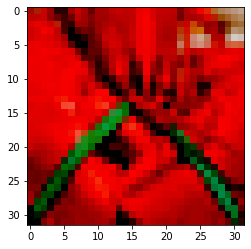

In [4]:
plt.imshow(train_data[100].permute(1,2,0))

In [5]:
def flatten(data_loader):
    images = []
    labels = []

    for img_chunk, label_chunk in data_loader:
        for img in img_chunk:
            img = np.array(img)
            img_flat = img.flatten()
            images.append(img_flat)
        for label in label_chunk:
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [6]:
X, y = flatten(train_data_loader)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=41, stratify=y)
X_test, y_test = flatten(test_data_loader)

## Linear SVM

In [7]:
from sklearn.svm import SVC

In [8]:
linear_svm = SVC(C=1.0, kernel='linear', probability=False, random_state=41,
                 decision_function_shape='ovr', tol=0.001, max_iter= -1, )

In [ ]:
linear_svm.fit(X_train, y_train)
y_pred_train = linear_svm.predict(X_train)
y_pred_val = linear_svm.predict(X_val)
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Train acccuracy: ', train_accuracy)
print('Validation accuracy: ', val_accuracy)